# DESI Trainning

In [1]:
import fitsio
import numpy as np
import healpy as hp
import pandas as pd
import seaborn as sns
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline

from Simulation.simulMap import *

In [2]:
#File names:
DIR = "Data DESI/"
FILE_NGC = DIR + "BGS_ANY_NGC_clustering.dat.fits"
FILE_SGC = DIR + "BGS_ANY_SGC_clustering.dat.fits"

#Reading files:
NGC = Table.read(FILE_NGC)
SGC = Table.read(FILE_SGC)
NGC

TARGETID,Z,NTILE,RA,DEC,PHOTSYS,FRAC_TLOBS_TILES,WEIGHT_ZFAIL,BITWEIGHTS,PROB_OBS,WEIGHT,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NX,WEIGHT_FKP
,,,deg,deg,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,
int64,float64,int64,float64,float64,bytes1,float64,float64,int64[2],float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64
39627540901396542,0.11780978798091779,1,159.21336539688306,-10.1570784990642,S,0.986125385405961,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,49.759033,82.394775,123.07306,107.12112,72.68243,0.013277792318345803,0.010644577467738883
39627540901396881,0.18852438367491672,1,159.31752567050466,-10.126518405884719,S,0.986125385405961,1.0003317594528198,-1 .. -1,1.0,0.40216447194805066,1.0,1.0,4.465552,9.0119915,15.1033325,19.139269,17.25489,0.007570508503506765,0.01852072744982418
39627546827951381,0.13939738520826428,1,157.87076725654435,-9.875451258938376,S,0.98491921005386,1.0000087022781372,-1 .. -1,1.0,0.4020345929185812,1.0,1.0,21.879585,30.944036,39.23734,31.118029,17.95399,0.011543794958537013,0.012223957863869393
39627546832142517,0.13384342727980247,1,157.95311366416092,-9.89176181427952,S,0.98491921005386,1.0,-6502010112314306597 .. -7014319551088676288,0.34375,1.1524891370855783,2.8666666666666667,1.0,64.23985,161.47015,326.29388,286.1153,183.32571,0.011543794958537013,0.012223957863869393
39627546832142599,0.13481237197080895,1,157.95938723949703,-9.900573678838345,S,0.98491921005386,1.0000147819519043,-1158348146330124321 .. -90865853993600030,0.6875,0.5827278403438851,1.449438202247191,1.0,13.473231,20.69669,29.218834,22.669884,17.1243,0.011543794958537013,0.012223957863869393
39627546832144102,0.3277038731563745,1,158.0586254092098,-9.883478054340443,S,0.98491921005386,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,4.8808885,13.26394,26.47439,35.094788,26.350426,0.0020923038580991644,0.0639135806306668
39627546832144556,0.2804423196541022,1,158.0919034157211,-9.885985138196315,S,0.98491921005386,1.0000360012054443,-1 .. -1,1.0,0.40204556793620055,1.0,1.0,4.8884478,10.819805,16.304056,14.631474,10.874418,0.0033096766342485067,0.041377478709825624
39627546832144612,0.1756295118675194,1,158.09744754077613,-9.948586941938014,S,0.98491921005386,1.0000108480453491,-8354376908713272321 .. -8487356173256100561,0.5390625,0.7408939110042868,1.8428571428571427,1.0,19.048483,29.186644,40.23485,27.274828,21.075787,0.008095592993999081,0.0173402934391804


## Data exoloration

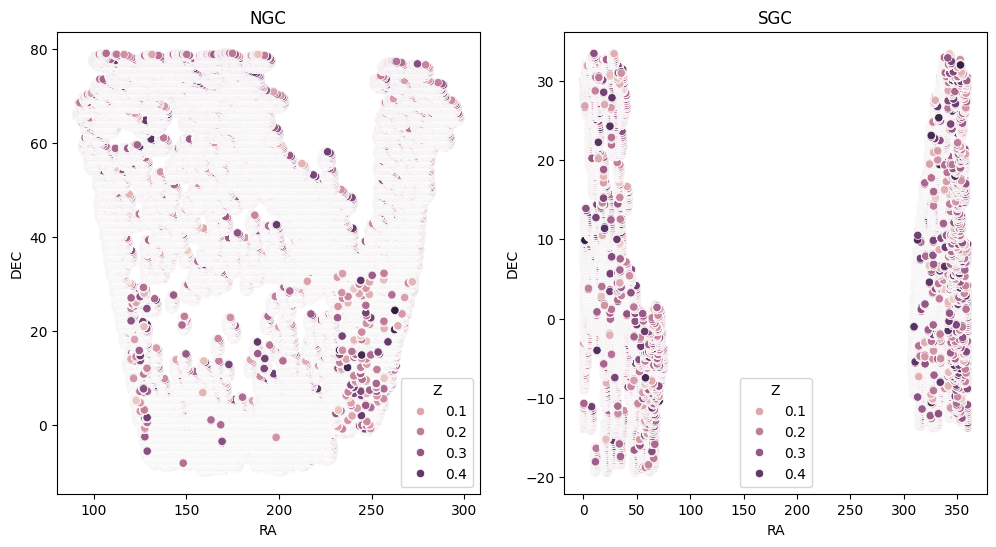

In [3]:
names = ["RA","DEC","Z"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(NGC[names].to_pandas(), x="RA", y="DEC", hue="Z", ax=ax[0])
ax[0].set_title('NGC')
sns.scatterplot(SGC[names].to_pandas(), x="RA", y="DEC", hue="Z", ax=ax[1])
ax[1].set_title('SGC');

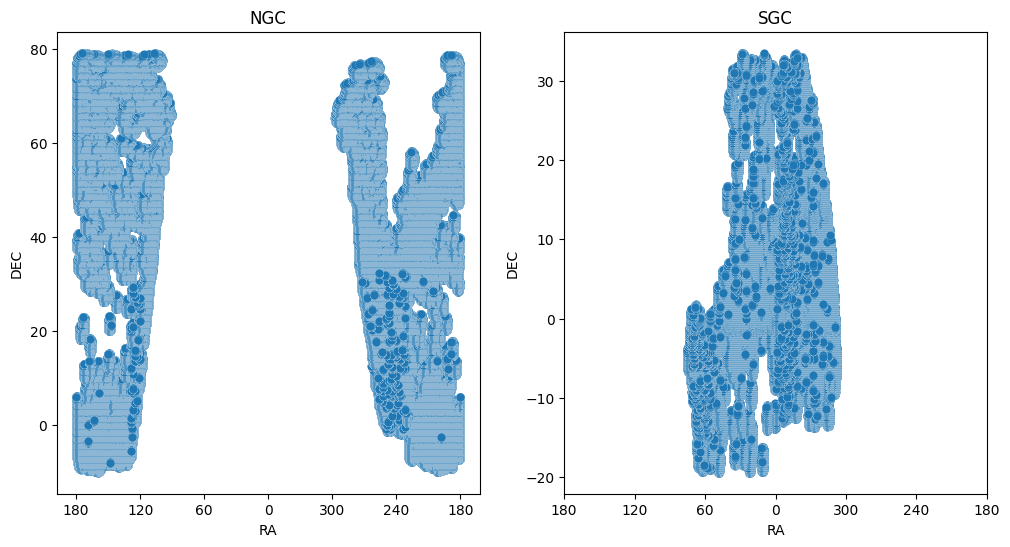

In [3]:
def recenter_RA(RA):
    return np.where(RA > 180,RA - 360, RA)

def plot_RADEC(RA, DEC, title='', RA_recenter=True, all_sky=True, **kwargs):
    if "figax" in kwargs.keys(): fig, ax = kwargs.pop("figax")
    else: fig, ax = plt.subplots()
    grid = kwargs.pop("grid", False)
    if RA_recenter: #make 360° correspond with 0°
        RA = RA.copy() #to not affect the data itself
        RA = recenter_RA(RA)
        RA_ticks = np.arange(-180, 201, 60)
        RA_labels = (RA_ticks + 360) % 360
    else:
        RA_ticks = np.arange(0, 361, 60)
        RA_labels = RA_ticks
    DEC_ticks = np.arange(-90, 91, 30)
    ax.scatter(RA, DEC, edgecolors='white', linewidths=0.1)
    if all_sky or RA_recenter:
        ax.set_xticks(RA_ticks)
        ax.set_xticklabels(RA_labels)
    if all_sky: ax.set_yticks(DEC_ticks)
    ax.invert_xaxis()
    ax.set_title(title)
    ax.set_xlabel("RA")
    ax.set_ylabel("DEC")
    if grid: ax.grid()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_RADEC(NGC["RA"], NGC["DEC"], title="NGC", figax = (fig, ax[0]), all_sky=False)
plot_RADEC(SGC["RA"], SGC["DEC"], title="SGC", figax = (fig, ax[1]), all_sky=False)

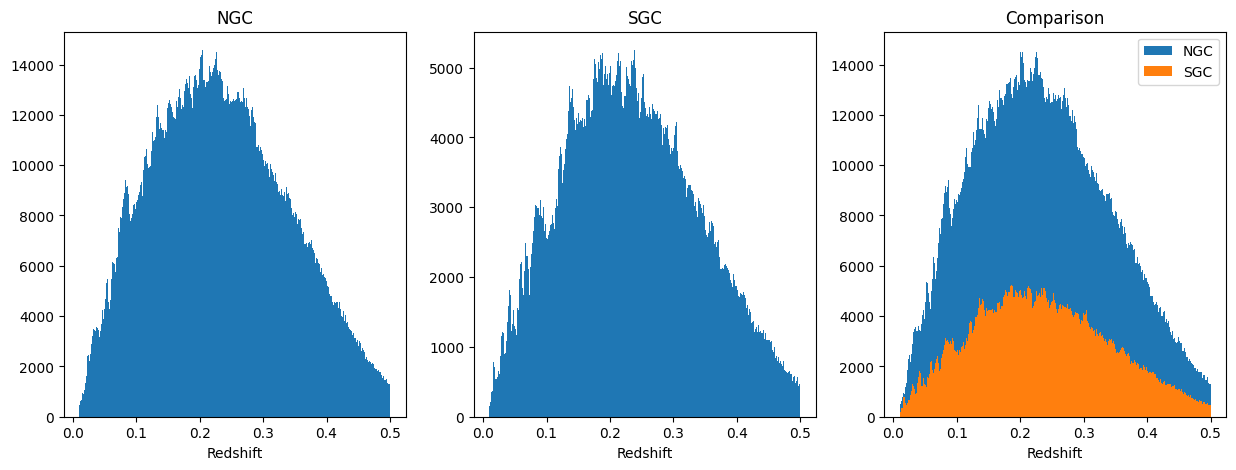

In [4]:
def histCompare_NS(col, xlabel, **kwargs):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    xscale = kwargs.pop('xscale', "linear")
    get_hist(NGC[col], xlabel=xlabel, title="NGC", show=False, figax = (fig, ax[0]), **kwargs)
    get_hist(SGC[col], xlabel=xlabel, title="SGC", show=False, figax = (fig, ax[1]), **kwargs)
    get_hist(NGC[col], xlabel=xlabel, title="Comparison", show=False, figax = (fig, ax[2]), label="NGC", **kwargs)
    get_hist(SGC[col], xlabel=xlabel, title="Comparison", show=False, figax = (fig, ax[2]), label="SGC", **kwargs)
    ax[2].legend()
    ax[0].set_xscale(xscale)
    ax[1].set_xscale(xscale)
    ax[2].set_xscale(xscale)
    return fig, ax

histCompare_NS("Z", "Redshift", bins=500);

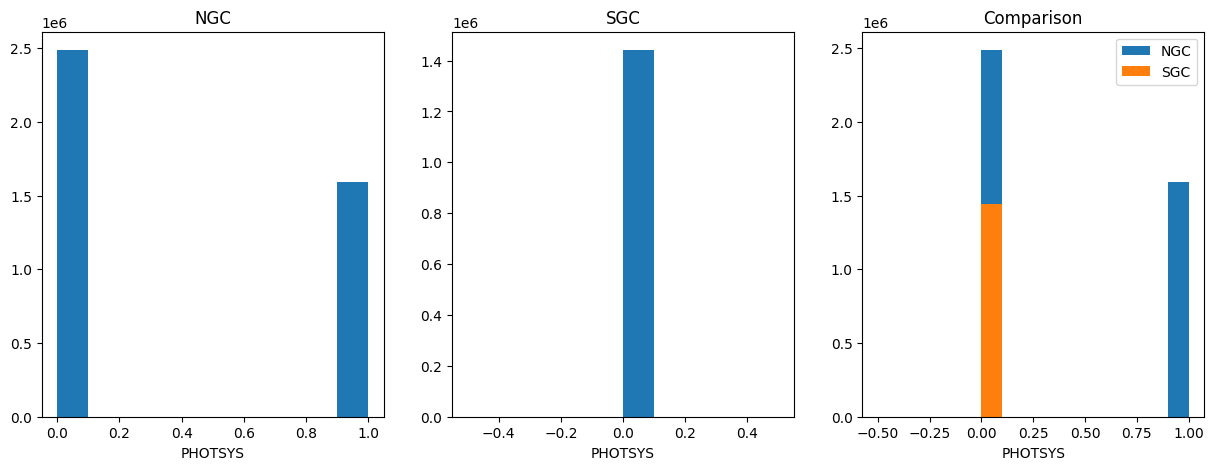

In [5]:
histCompare_NS("PHOTSYS", "PHOTSYS");

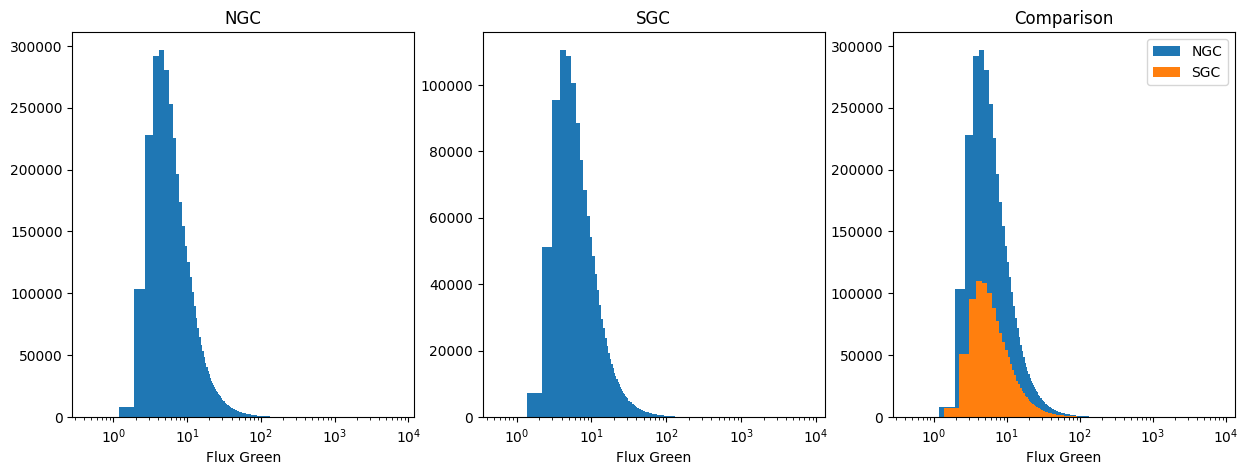

In [6]:
histCompare_NS("flux_g_dered", "Flux Green", bins=10000, xscale="log");

## Maps

In [3]:
NSIDE = 128
NPIX = hp.nside2npix(NSIDE)
area_deg2 = hp.nside2pixarea(NSIDE, degrees=True)
print("Number of pixels = {}".format(NPIX))
print("Surface of a pixel = {} deg^2".format(area_deg2))
FILE = DIR + "NSource_px_Nside{}.csv".format(NSIDE)

Number of pixels = 196608
Surface of a pixel = 0.2098234113027917 deg^2


Because of the computation time, we have computed the nb. of sources by pixel for both datasets, and saved them into an external .csv file. This allow to not have to compute it every time we execute the notebook. The code is presented in the cell below:

```
NSource_NGC = RADEC2NSource(NSIDE, NGC['RA'], NGC['DEC'], nest=True)
NSource_SGC = RADEC2NSource(NSIDE, SGC['RA'], SGC['DEC'], nest=True)
pd.DataFrame({'NGC': NSource_NGC, 'SGC': NSource_SGC}).to_csv(FILE)
```

In [4]:
NSource_df = pd.read_csv(FILE)
NSource_NGC, NSource_SGC = np.array(NSource_df['NGC']), np.array(NSource_df['SGC'])
del NSource_df #to save memory

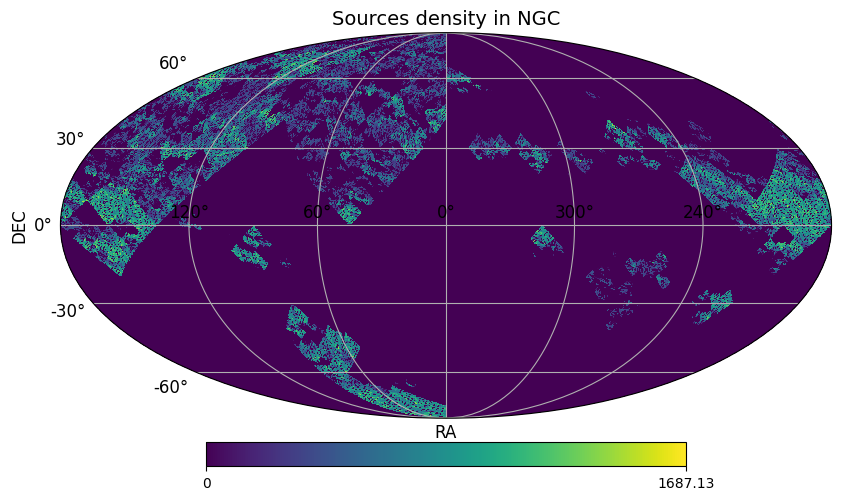

In [5]:
hp.projview(NSource_NGC/area_deg2, title="Sources density in NGC", nest=True, graticule=True, graticule_labels=True, projection_type="mollweide")
plt.xlabel("RA")
plt.ylabel("DEC");

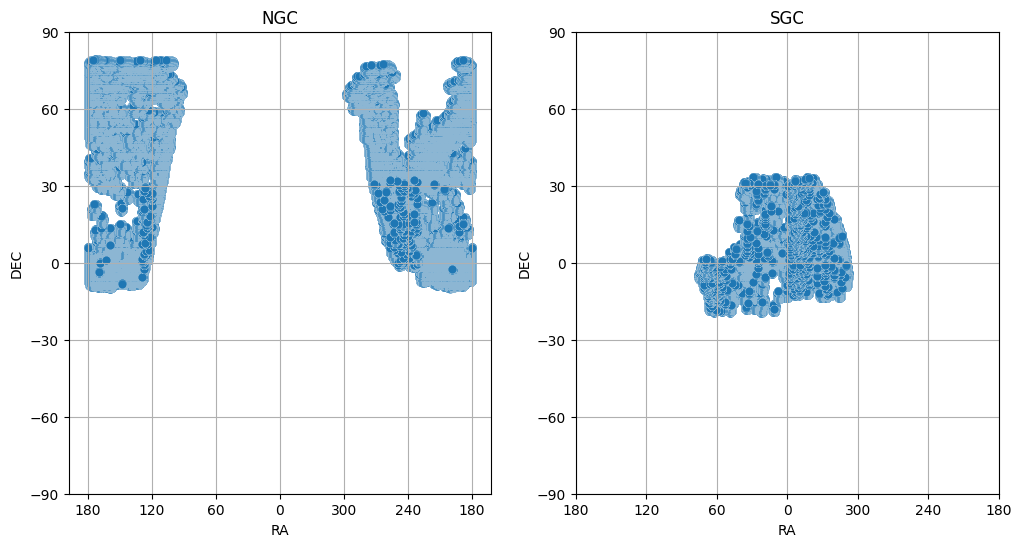

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot_RADEC(NGC["RA"], NGC["DEC"], title="NGC", figax = (fig, ax[0]), grid=True)
plot_RADEC(SGC["RA"], SGC["DEC"], title="SGC", figax = (fig, ax[1]), grid=True)

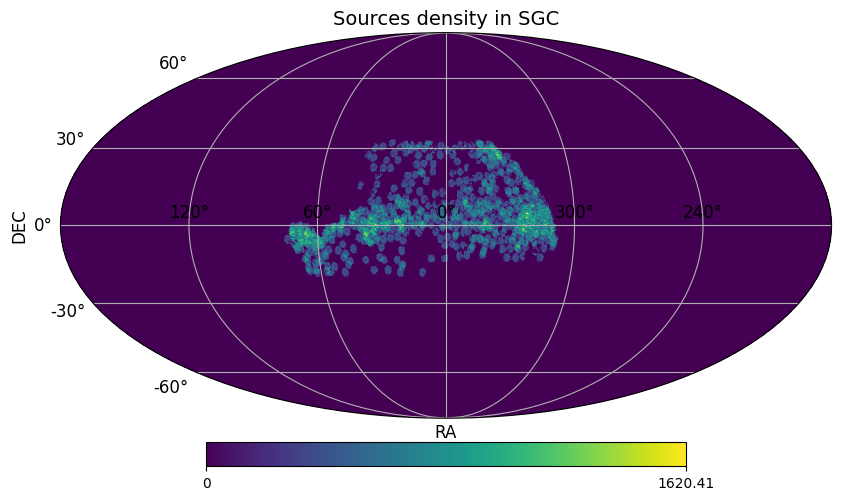

In [6]:
hp.projview(NSource_SGC/area_deg2, title="Sources density in SGC", nest=True, graticule=True, graticule_labels=True, projection_type="mollweide")
plt.xlabel("RA")
plt.ylabel("DEC");

In [21]:
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.colors as mcolors

def plot_moll2(healpix_map,
              label,
              rot=120,
              cmap='jet',
              projection='mollweide', 
              figsize=(11.0, 7.0), 
              xpad=1.25, 
              labelpad=-37, 
              xlabel_labelpad=10.0, 
              ycb_pos=-0.15,
              ):
    # transform healpix map to 2d array
    plt.figure(1)
    m = hp.ma(healpix_map)
    map_to_plot = hp.cartview(m, nest=True, rot=rot, flip='geo', fig=1, return_projected_map=True)
    plt.close()

    # build ra, dec meshgrid to plot 2d array
    ra_edge = np.linspace(-180, 180, map_to_plot.shape[1] + 1)
    dec_edge = np.linspace(-90, 90, map_to_plot.shape[0] + 1)

    ra_edge[ra_edge > 180] -= 360    # scale conversion to [-180, 180]
    ra_edge = -ra_edge               # reverse the scale: East to the left

    ra_grid, dec_grid = np.meshgrid(ra_edge, dec_edge)

    plt.figure(figsize=figsize)
    ax = plt.subplot(111, projection=projection)
    plt.subplots_adjust(left=0.14, bottom=0.18, right=0.96, top=0.90)

    mesh = plt.pcolormesh(np.radians(ra_grid), np.radians(dec_grid), map_to_plot, cmap=cmap, edgecolor='none', lw=0)

    #ra, dec = hp.pix2ang(NSIDE, healpix_map, nest=True, lonlat=True)
    #ax.plot(np.radians(ra), np.radians(dec), linestyle='-', linewidth=0.8, color='black')


    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels + 360 + rot, 360)
    tick_labels = np.array([f'{lab}°' for lab in tick_labels])
    ax.set_xticklabels(tick_labels)

    ax.set_xlabel('R.A. [deg]', labelpad=xlabel_labelpad)
    ax.xaxis.set_label_position('top')
    ax.set_ylabel('Dec. [deg]')
    
    color_map = cm.get_cmap(cmap)
    values_map = np.unique(healpix_map)[~np.isnan(np.unique(healpix_map))]  
    

    return ax

/tmp/ipykernel_672/1340888854.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap(cmap)


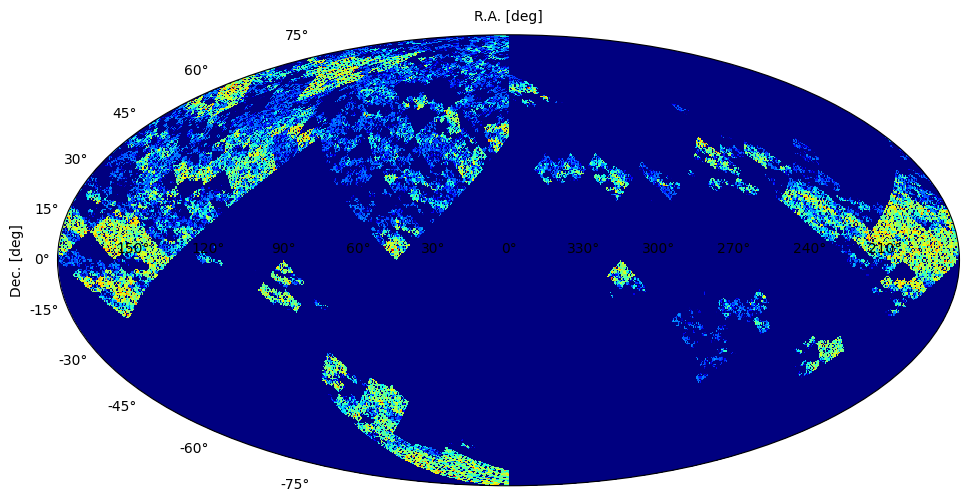

In [25]:
plot_moll2(NSource_NGC/area_deg2, "NGC", rot=0);

/tmp/ipykernel_672/1340888854.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap(cmap)


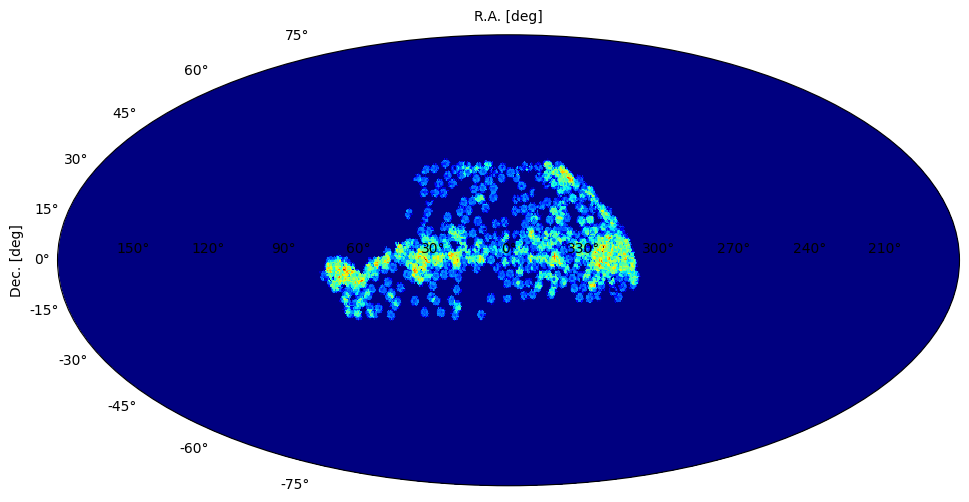

In [24]:
plot_moll2(NSource_SGC/area_deg2, "SGC", rot=0);

NameError: name '_get_galactic_plane' is not defined

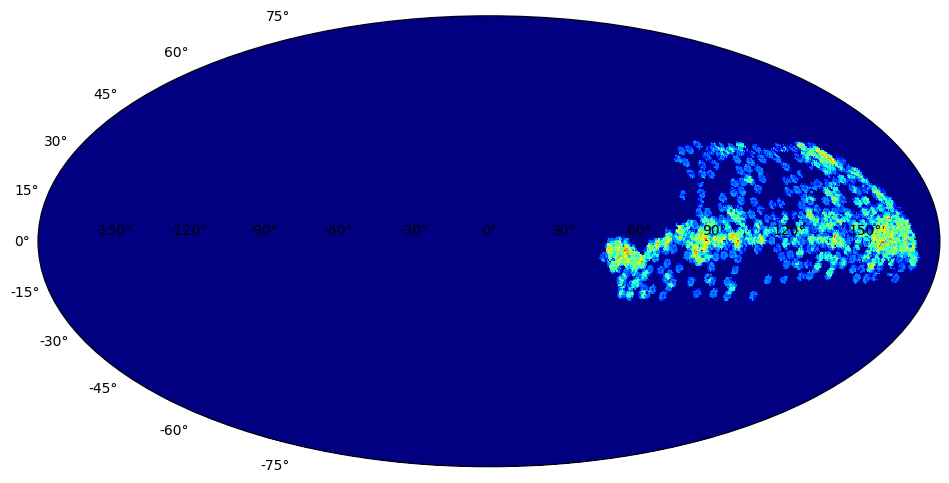

In [44]:
plot_moll(NSource_SGC/area_deg2, "NGC")

In [45]:
#addinf pixel number by source:
px_colname = "px_Nside{}".format(NSIDE)
NGC.add_column(hp.ang2pix(NSIDE, NGC['RA'], NGC['DEC'], lonlat=True, nest=True), name=px_colname)
NGC[px_colname].unit = None
SGC.add_column(hp.ang2pix(NSIDE, SGC['RA'], SGC['DEC'], lonlat=True, nest=True), name=px_colname)
SGC[px_colname].unit = None
NGC

TARGETID,Z,NTILE,RA,DEC,PHOTSYS,FRAC_TLOBS_TILES,WEIGHT_ZFAIL,BITWEIGHTS,PROB_OBS,WEIGHT,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NX,WEIGHT_FKP,px_Nside128
,,,deg,deg,,,,,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,,
int64,float64,int64,float64,float64,bytes1,float64,float64,int64[2],float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float64,int64
39627540901396542,0.11780978798091779,1,159.21336539688306,-10.1570784990642,S,0.986125385405961,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,49.759033,82.394775,123.07306,107.12112,72.68243,0.013277792318345803,0.010644577467738883,106913
39627540901396881,0.18852438367491672,1,159.31752567050466,-10.126518405884719,S,0.986125385405961,1.0003317594528198,-1 .. -1,1.0,0.40216447194805066,1.0,1.0,4.465552,9.0119915,15.1033325,19.139269,17.25489,0.007570508503506765,0.01852072744982418,106913
39627546827951381,0.13939738520826428,1,157.87076725654435,-9.875451258938376,S,0.98491921005386,1.0000087022781372,-1 .. -1,1.0,0.4020345929185812,1.0,1.0,21.879585,30.944036,39.23734,31.118029,17.95399,0.011543794958537013,0.012223957863869393,106922
39627546832142517,0.13384342727980247,1,157.95311366416092,-9.89176181427952,S,0.98491921005386,1.0,-6502010112314306597 .. -7014319551088676288,0.34375,1.1524891370855783,2.8666666666666667,1.0,64.23985,161.47015,326.29388,286.1153,183.32571,0.011543794958537013,0.012223957863869393,106920
39627546832142599,0.13481237197080895,1,157.95938723949703,-9.900573678838345,S,0.98491921005386,1.0000147819519043,-1158348146330124321 .. -90865853993600030,0.6875,0.5827278403438851,1.449438202247191,1.0,13.473231,20.69669,29.218834,22.669884,17.1243,0.011543794958537013,0.012223957863869393,106920
39627546832144102,0.3277038731563745,1,158.0586254092098,-9.883478054340443,S,0.98491921005386,1.0,-1 .. -1,1.0,0.4020310943321785,1.0,1.0,4.8808885,13.26394,26.47439,35.094788,26.350426,0.0020923038580991644,0.0639135806306668,106920
39627546832144556,0.2804423196541022,1,158.0919034157211,-9.885985138196315,S,0.98491921005386,1.0000360012054443,-1 .. -1,1.0,0.40204556793620055,1.0,1.0,4.8884478,10.819805,16.304056,14.631474,10.874418,0.0033096766342485067,0.041377478709825624,106920
39627546832144612,0.1756295118675194,1,158.09744754077613,-9.948586941938014,S,0.98491921005386,1.0000108480453491,-8354376908713272321 .. -8487356173256100561,0.5390625,0.7408939110042868,1.8428571428571427,1.0,19.048483,29.186644,40.23485,27.274828,21.075787,0.008095592993999081,0.0173402934391804,106920


KeyboardInterrupt: 

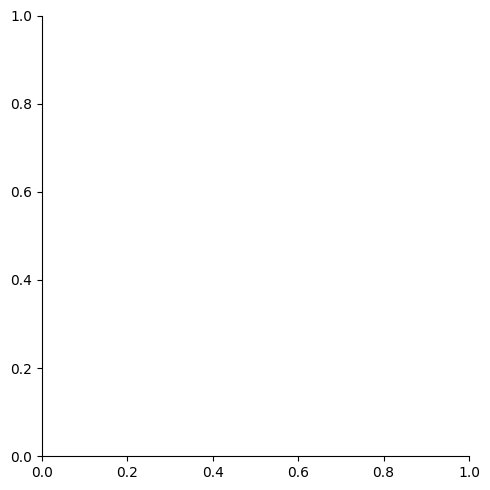

In [52]:
names = [px_colname,"Z"]
#fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.displot(NGC[names].to_pandas(), x=px_colname, hue='Z', multiple="stack")
#ax[0].set_title('NGC')
#sns.scatterplot(SGC[names].to_pandas(), x="RA", y="DEC", hue="Z", ax=ax[1])
#ax[1].set_title('SGC');